<a href="https://colab.research.google.com/github/harshithar416/Spotify-Recommendation-/blob/main/Spotify_recommendation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import roc_auc_score,roc_curve
import statsmodels.formula.api as smf
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
import warnings


warnings.filterwarnings("ignore")

In [3]:
# load dataset.
spotify = pd.read_csv("/content/dataset.csv", index_col=0)
spotify.head()

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73.0,230666.0,False,0.676,0.4610,1.0,-6.746,0.0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4.0,acoustic
1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55.0,149610.0,False,0.420,0.1660,1.0,-17.235,1.0,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4.0,acoustic
2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57.0,210826.0,False,0.438,0.3590,0.0,-9.734,1.0,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4.0,acoustic
3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71.0,201933.0,False,0.266,0.0596,0.0,-18.515,1.0,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3.0,acoustic
4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82.0,198853.0,False,0.618,0.4430,2.0,-9.681,1.0,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4.0,acoustic


In [6]:
spotify.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 66016 entries, 0 to 66015
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   track_id          66016 non-null  object 
 1   artists           66014 non-null  object 
 2   album_name        66014 non-null  object 
 3   track_name        66014 non-null  object 
 4   popularity        66015 non-null  float64
 5   duration_ms       66015 non-null  float64
 6   explicit          66015 non-null  object 
 7   danceability      66015 non-null  float64
 8   energy            66015 non-null  float64
 9   key               66015 non-null  float64
 10  loudness          66015 non-null  float64
 11  mode              66015 non-null  float64
 12  speechiness       66015 non-null  float64
 13  acousticness      66015 non-null  float64
 14  instrumentalness  66015 non-null  float64
 15  liveness          66015 non-null  float64
 16  valence           66015 non-null  float6

In [8]:
spotify.isnull().sum()

track_id            0
artists             2
album_name          2
track_name          2
popularity          1
duration_ms         1
explicit            1
danceability        1
energy              1
key                 1
loudness            1
mode                1
speechiness         1
acousticness        1
instrumentalness    1
liveness            1
valence             1
tempo               1
time_signature      1
track_genre         1
dtype: int64

In [10]:
spotify = spotify.dropna()

In [13]:
spotify.describe(include=["bool", "object"])

,track_id,artists,album_name,track_name,explicit,track_genre
count,66014,66014,66014,66014,66014,66014
unique,55909,19719,29178,46450,2,67
top,0XDo1WmF8c70NuTZcMP2FH,George Jones,The Complete Hank Williams,Last Last,False,acoustic
freq,6,271,111,75,59292,1000


In [14]:
# NA value control after using dropna()
spotify.isnull().sum()

track_id            0
artists             0
album_name          0
track_name          0
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64

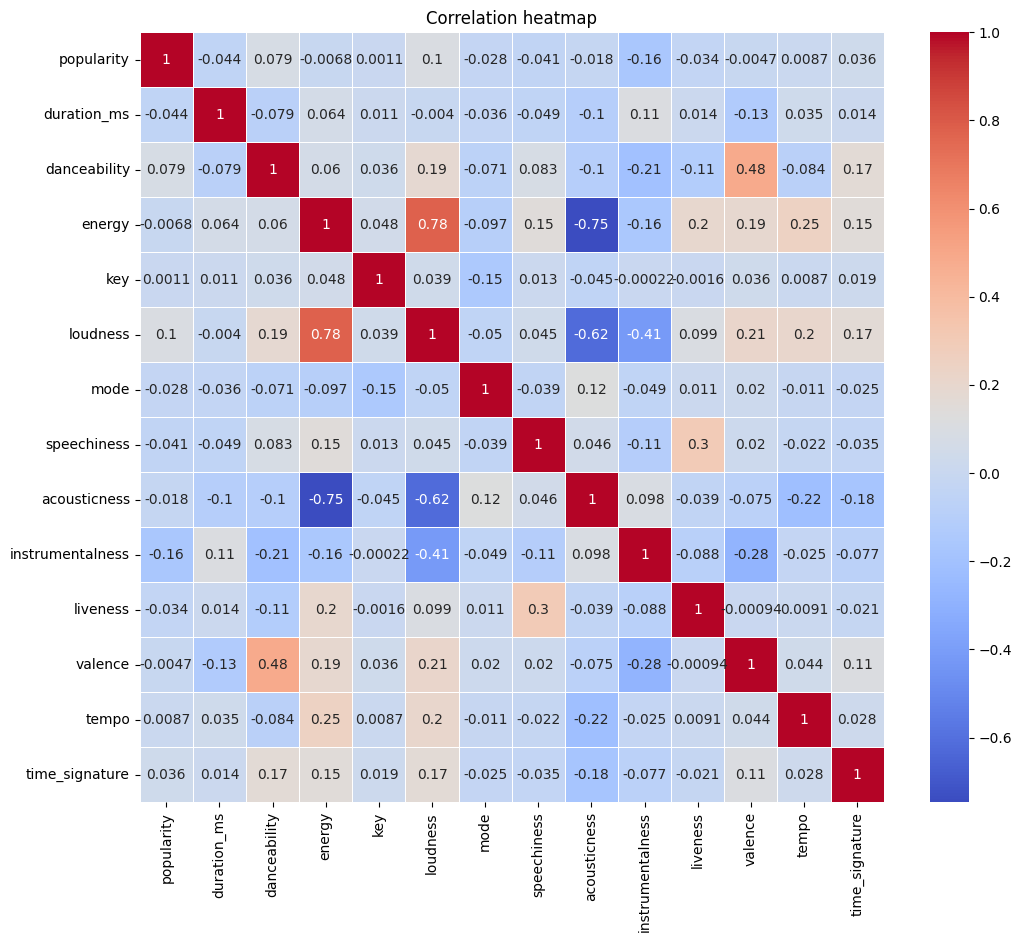

In [17]:

corr_matrix = spotify.select_dtypes(include=["int", "float"]).corr()


plt.figure(figsize=(12, 10))  # Daha büyük bir alan ayarlayın
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5, annot_kws={"size": 10})
plt.title('Correlation heatmap')
plt.show()

In [18]:
data = spotify.copy()
data.head()

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73.0,230666.0,False,0.676,0.4610,1.0,-6.746,0.0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4.0,acoustic
1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55.0,149610.0,False,0.420,0.1660,1.0,-17.235,1.0,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4.0,acoustic
2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57.0,210826.0,False,0.438,0.3590,0.0,-9.734,1.0,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4.0,acoustic
3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71.0,201933.0,False,0.266,0.0596,0.0,-18.515,1.0,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3.0,acoustic
4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82.0,198853.0,False,0.618,0.4430,2.0,-9.681,1.0,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4.0,acoustic


In [19]:
data = data.drop(labels=["track_id", "artists", "album_name", "track_name", "track_genre"], axis=1)

In [21]:
#  Test-Train Split

X = data.drop("danceability", axis=1)
y = data["danceability"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=21)

print("Shape of X_train",X_train.shape)
print("Shape of X_test",X_test.shape)
print("Shape of y_train", y_train.shape)
print("Shape of y_test", y_test.shape)

Shape of X_train (46209, 14)
Shape of X_test (19805, 14)
Shape of y_train (46209,)
Shape of y_test (19805,)


In [22]:
from sklearn.ensemble import RandomForestRegressor


model_rf = RandomForestRegressor()
model_rf.fit(X_train, y_train)


y_pred_rf = model_rf.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)
print(f"Mean Squared Error (MSE): {mse_rf}")
print(f"Mean Absolute Error (MAE): {mae_rf}")
print(f"R-squared (R2): {r2_rf}")

Mean Squared Error (MSE): 0.008915309289221459
Mean Absolute Error (MAE): 0.06703004922999246
R-squared (R2): 0.6989679424557487


In [23]:
predict_all = model_rf.predict(X)

In [24]:
dance = pd.DataFrame(model_rf.predict(X))
dance = dance.rename(columns={0: "danceability"})

In [25]:
index = dance.sort_values(by="danceability", ascending=False)[:50].index
playlist = spotify.loc[index]

In [26]:
playlist

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
14007,1nTBgueuGtO762MadGoWvZ,CoComelon,"CoComelon Kids Hits, Vol. 2",Five Little Monkeys Jumping on the Bed,64.0,169302.0,False,0.959,0.200,4.0,-12.650,1.0,0.1550,0.800000,0.003980,0.0842,0.717,119.925,3.0,children
56334,1aPqexHVW20OTamBHdWWVL,Timeflies,Just For Fun (Deluxe),Undress Rehearsal,60.0,214786.0,False,0.953,0.652,11.0,-4.159,0.0,0.0849,0.004560,0.000000,0.0287,0.730,122.997,4.0,indie-pop
53697,1aPqexHVW20OTamBHdWWVL,Timeflies,Just For Fun (Deluxe),Undress Rehearsal,60.0,214786.0,False,0.953,0.652,11.0,-4.159,0.0,0.0849,0.004560,0.000000,0.0287,0.730,122.997,4.0,house
57682,1aPqexHVW20OTamBHdWWVL,Timeflies,Just For Fun (Deluxe),Undress Rehearsal,60.0,214786.0,False,0.953,0.652,11.0,-4.159,0.0,0.0849,0.004560,0.000000,0.0287,0.730,122.997,4.0,indie
60104,0Mg5cbRrpU5VF3tV90hmvk,Skillibeng;Fivio Foreign;French Montana,Whap Whap (feat. Fivio Foreign & French Montana),Whap Whap (feat. Fivio Foreign & French Montana),58.0,161495.0,True,0.950,0.825,6.0,-5.284,0.0,0.2680,0.382000,0.000012,0.0867,0.733,106.978,4.0,j-dance
21559,0Mg5cbRrpU5VF3tV90hmvk,Skillibeng;Fivio Foreign;French Montana,Whap Whap (feat. Fivio Foreign & French Montana),Whap Whap (feat. Fivio Foreign & French Montana),58.0,161495.0,True,0.950,0.825,6.0,-5.284,0.0,0.2680,0.382000,0.000012,0.0867,0.733,106.978,4.0,dancehall
21905,2AGiN5z9F0PjWMudpmbMNv,Sean Paul,Temperature,Temperature,30.0,218573.0,False,0.951,0.600,0.0,-4.675,0.0,0.0685,0.106000,0.000000,0.0712,0.822,125.040,4.0,dancehall
14064,6cG4v6cDjjrlqooK2ey6Od,CoComelon,Nursery Rhymes by CoComelon,Five Little Monkeys Jumping on the Bed,47.0,169302.0,False,0.959,0.200,4.0,-12.650,1.0,0.1550,0.800000,0.003980,0.0842,0.717,119.925,3.0,children
21057,0k2GOhqsrxDTAbFFSdNJjT,Sean Paul,The Trinity,Temperature,79.0,218573.0,False,0.951,0.600,0.0,-4.675,0.0,0.0685,0.106000,0.000000,0.0712,0.822,125.040,4.0,dancehall
20717,0k2GOhqsrxDTAbFFSdNJjT,Sean Paul,The Trinity,Temperature,79.0,218573.0,False,0.951,0.600,0.0,-4.675,0.0,0.0685,0.106000,0.000000,0.0712,0.822,125.040,4.0,dance


In [27]:
import xgboost as xgb
from xgboost import XGBClassifier

xgb=XGBClassifier(n_estimators=1000, seed = 123)